Normal game simulation for questions 1 and 2.

Gen 0: T4T: 0.1 G: 0.0 AC: 0.8 AD: 0.1
Gen 0: T4T: 27600 G: 0 AC: 213600 AD: 42300 Total: 283500
Gen 0: T4T: 2760.0 G: 0 AC: 2670.0 AD: 4230.0
Gen 1: T4T: 0.1 G: 0.0 AC: 0.75 AD: 0.15
Gen 1: T4T: 26550 G: 0 AC: 189000 AD: 60450 Total: 276000
Gen 1: T4T: 2655.0 G: 0 AC: 2520.0 AD: 4030.0
Gen 2: T4T: 0.1 G: 0.0 AC: 0.7 AD: 0.2
Gen 2: T4T: 25500 G: 0 AC: 165900 AD: 76600 Total: 268000
Gen 2: T4T: 2550.0 G: 0 AC: 2370.0 AD: 3830.0
Gen 3: T4T: 0.1 G: 0.0 AC: 0.65 AD: 0.25
Gen 3: T4T: 24450 G: 0 AC: 144300 AD: 90750 Total: 259500
Gen 3: T4T: 2445.0 G: 0 AC: 2220.0 AD: 3630.0
Gen 4: T4T: 0.1 G: 0.0 AC: 0.6 AD: 0.3
Gen 4: T4T: 23400 G: 0 AC: 124200 AD: 102900 Total: 250500
Gen 4: T4T: 2340.0 G: 0 AC: 2070.0 AD: 3430.0
Gen 5: T4T: 0.1 G: 0.0 AC: 0.55 AD: 0.35
Gen 5: T4T: 22350 G: 0 AC: 105600 AD: 113050 Total: 241000
Gen 5: T4T: 2235.0 G: 0 AC: 1920.0 AD: 3230.0
Gen 6: T4T: 0.1 G: 0.0 AC: 0.5 AD: 0.4
Gen 6: T4T: 21300 G: 0 AC: 88500 AD: 121200 Total: 231000
Gen 6: T4T: 2130.0 G: 0 AC: 1770.0 AD

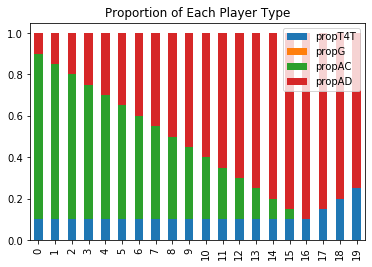

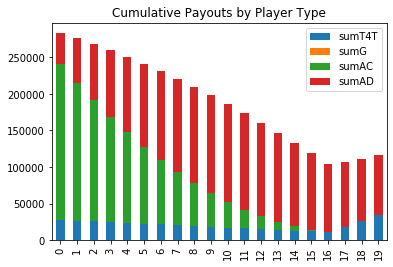

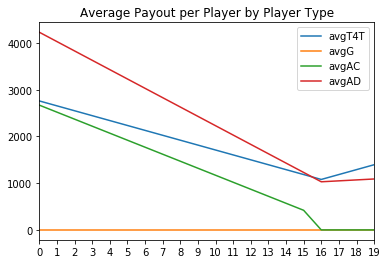

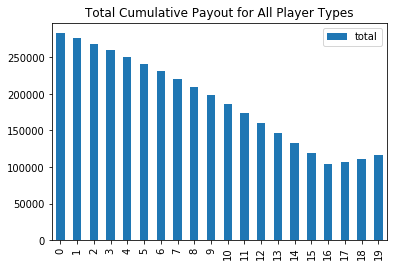

In [14]:
import pandas as pd
import random
import matplotlib.pyplot as plt

df_prop = pd.DataFrame(columns = ['propT4T', 'propG', 'propAC', 'propAD'])
df_payout = pd.DataFrame(columns = ['sumT4T', 'sumG', 'sumAC', 'sumAD'])
df_avg = pd.DataFrame(columns = ['avgT4T', 'avgG', 'avgAC', 'avgAD'])
df_total = pd.DataFrame(columns = ['total'])

n = 100
m = 5
p = 5
k = 20

if(n%4 != 0):
    n = int(4 * round(float(n)/4))

#numT4T = int(n/4)
#numG = int(n/4)
#numAC = int(n/4)
#numAD = int(n/4)

#numT4T = 1
#numG = 1
#numAC = 1
#numAD = 97

#numT4T = 25
#numG = 25
#numAC = 0
#numAD = 50

numT4T = 10
numG = 0
numAC = 80
numAD = 10

def createPlayers(numT4T, numG, numAC, numAD):
    players = []
    for x in list(range(0, numT4T)):
        players.append(['T4T', 'T4T'+str(x), 0, []])

    for x in list(range(0, numG)):
        players.append(['G','G'+str(x), 0, []])

    for x in list(range(0, numAC)):
        players.append(['AC','AC'+str(x), 0])

    for x in list(range(0, numAD)):
        players.append(['AD','AD'+str(x), 0])
    random.shuffle(players)
    return players
    
def playGame(p, o):
    #True = Cooperate, False = Defect
    pMove = True
    oMove = True
    
    #T4T logic
    if(p[0] == 'T4T'):
        if(o[1] in p[3]):
            pMove = False
            #print(p[3])
            p[3].remove(o[1])
            #print('hello')
        else:
            pMove = True
    if(o[0] == 'T4T'):
        if(p[1] in o[3]):
            oMove = False
            o[3].remove(p[1])
            #print('hello')
        else:
            oMove = True 
    #G logic       
    if(p[0] == 'G'):
        if(o[1] in p[3]):
            pMove = False
        else:
            pMove = True
    if(o[0] == 'G'):
        if(p[1] in o[3]):
            oMove = False
        else:
            oMove = True 
    
    #AC logic
    if(p[0] == 'AC'):
        pMove = True
    if(o[0] == 'AC'):
        oMove = True
    
    #AD logic
    if(p[0] == 'AD'):
        pMove = False
    if(o[0] == 'AD'):
        oMove = False
        
    #Payouts
    if(pMove == True and oMove == True):
        p[2] = p[2] + 3
        o[2] = o[2] + 3
        
    if(pMove == False and oMove == True):
        p[2] = p[2] + 5
        
    if(pMove == True and oMove == False):
        o[2] = o[2] + 5
    
    if(pMove == False and oMove == False):
        p[2] = p[2] + 1
        o[2] = o[2] + 1
     
    #T4T and G logic
    if((p[0]=='T4T' or p[0]=='G') and oMove == False):
        p[3].append(o[1])
        #print(p[3])
    if((o[0]=='T4T' or o[0]=='G') and pMove == False):
        o[3].append(p[1])
        #print('t4t')

for k in list(range(0,k)):
    propT4T = numT4T/n
    propG = numG/n
    propAC = numAC/n
    propAD = numAD/n
    props = {'propT4T':propT4T, 'propG':propG, 'propAC':propAC,'propAD':propAD}
    df_prop = df_prop.append(props, ignore_index = True)
    print("Gen " + str(k) + ": T4T: " + str(propT4T) + " G: "+ str(propG) + " AC: " + str(propAC) + " AD: " + str(propAD)) 
    
    players = createPlayers(numT4T, numG, numAC, numAD)
    for g in list(range(0,m)):    
        for y in players:
            #print(p[0])
            for o in players:
                if(o[1] != y[1]):
                    playGame(y, o)
    
    rankedPlayers = sorted(players, key = lambda x: int(x[2]), reverse=True)
    
    sumT4T = 0
    sumG = 0
    sumAC = 0
    sumAD = 0
    
    for r in rankedPlayers:
        if(r[0] == 'T4T'):
            sumT4T = sumT4T+r[2]
            
        if(r[0] == 'G'):
            sumG = sumG+r[2]
            
        if(r[0] == 'AC'):
            sumAC = sumAC+r[2]
            
        if(r[0] == 'AD'):
            sumAD = sumAD+r[2]
    
    total = sumT4T+sumG+sumAC+sumAD      
    print("Gen " + str(k) + ": T4T: " + str(sumT4T) + " G: "+ str(sumG) + " AC: " + str(sumAC) + " AD: " + str(sumAD)+ " Total: " + str(total))
    
    totals={'total':total}
    df_total = df_total.append(totals, ignore_index=True)
    
    if(numT4T != 0):
        avgT4T = sumT4T/numT4T
    else:
        avgT4T = 0
        
    if(numG != 0):
        avgG = sumG/numG
    else:
        avgG = 0
        
    if(numAC != 0):
        avgAC = sumAC/numAC
    else:
        avgAC = 0
        
    if(numAD != 0):
        avgAD = sumAD/numAD
    else:
        avgAD = 0
    
    print("Gen " + str(k) + ": T4T: " + str(avgT4T) + " G: "+ str(avgG) + " AC: " + str(avgAC) + " AD: " + str(avgAD))
    
    payouts = {'sumT4T':sumT4T, 'sumG':sumG, 'sumAC':sumAC,'sumAD':sumAD}
    avgs = {'avgT4T':avgT4T, 'avgG':avgG, 'avgAC':avgAC,'avgAD':avgAD}
    df_payout = df_payout.append(payouts, ignore_index = True)
    df_avg = df_avg.append(avgs, ignore_index = True)
    
    remove = 0 - int((p/100)*n)
    rankedPlayers = rankedPlayers[:remove]
    rankedPlayers = rankedPlayers+ rankedPlayers[:-remove]

    numT4T = 0
    numG = 0
    numAC = 0
    numAD = 0
    
    for r in rankedPlayers:
        if(r[0] == 'T4T'):
            numT4T = numT4T+1
            
        if(r[0] == 'G'):
            numG = numG+1
            
        if(r[0] == 'AC'):
            numAC = numAC+1
            
        if(r[0] == 'AD'):
            numAD = numAD+1
            
print(df_prop)   
print(df_payout)
print(df_total)
#print(len(rankedPlayers))   
#for p in rankedPlayers:
    #print(p[0] + ": " + str(p[2]))
df_prop.plot(xticks = df_prop.index, kind = 'bar', stacked = True, title = 'Proportion of Each Player Type')
df_payout.plot(xticks = df_payout.index, kind = 'bar', stacked = True, title = 'Cumulative Payouts by Player Type')
df_avg.plot(xticks = df_avg.index, title = 'Average Payout per Player by Player Type')
df_total.plot(xticks = df_total.index, kind = 'bar', stacked = True, title = 'Total Cumulative Payout for All Player Types')


Changing-P simulation for Question 3.

Gen 0: T4T: 0.25 G: 0.25 AC: 0.25 AD: 0.25
Gen 0: T4T: 61125 G: 61125 AC: 55500 AD: 54750 Total: 232500
Gen 0: T4T: 2445.0 G: 2445.0 AC: 2220.0 AD: 2190.0
Gen 1: T4T: 0.26 G: 0.25 AC: 0.25 AD: 0.24
Gen 1: T4T: 64116 G: 61650 AC: 56250 AD: 52656 Total: 234672
Gen 1: T4T: 2466.0 G: 2466.0 AC: 2250.0 AD: 2194.0
Gen 2: T4T: 0.26 G: 0.26 AC: 0.25 AD: 0.23
Gen 2: T4T: 64662 G: 64662 AC: 57000 AD: 50554 Total: 236878
Gen 2: T4T: 2487.0 G: 2487.0 AC: 2280.0 AD: 2198.0
Gen 3: T4T: 0.27 G: 0.26 AC: 0.25 AD: 0.22
Gen 3: T4T: 67716 G: 65208 AC: 57750 AD: 48444 Total: 239118
Gen 3: T4T: 2508.0 G: 2508.0 AC: 2310.0 AD: 2202.0
Gen 4: T4T: 0.27 G: 0.27 AC: 0.25 AD: 0.21
Gen 4: T4T: 68283 G: 68283 AC: 58500 AD: 46326 Total: 241392
Gen 4: T4T: 2529.0 G: 2529.0 AC: 2340.0 AD: 2206.0
Gen 5: T4T: 0.28 G: 0.27 AC: 0.25 AD: 0.2
Gen 5: T4T: 71400 G: 68850 AC: 59250 AD: 44200 Total: 243700
Gen 5: T4T: 2550.0 G: 2550.0 AC: 2370.0 AD: 2210.0
Gen 6: T4T: 0.29 G: 0.27 AC: 0.25 AD: 0.19
Gen 6: T4T: 74559 G: 69417 A

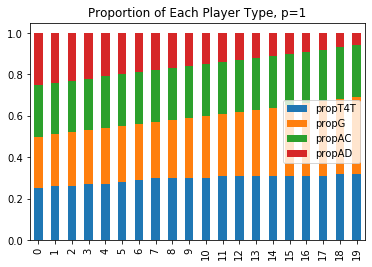

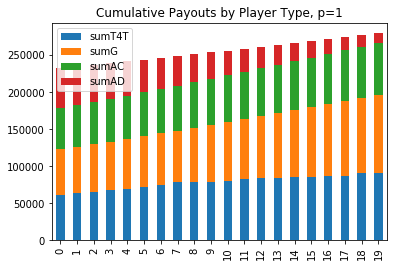

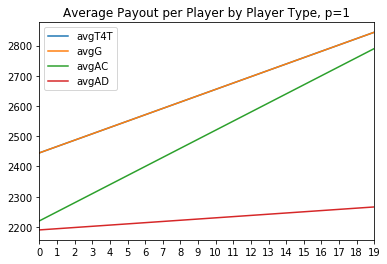

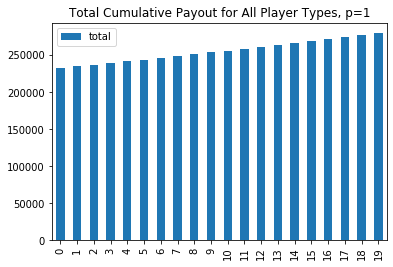

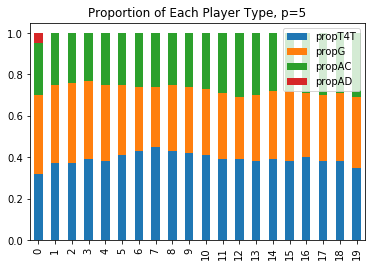

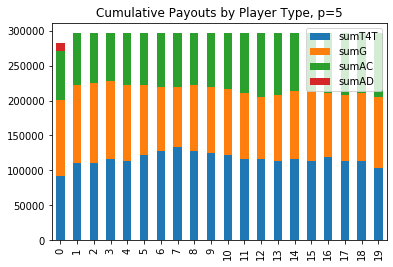

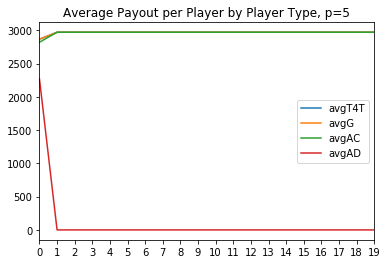

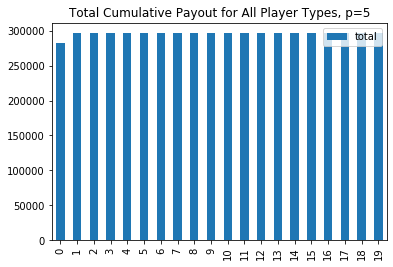

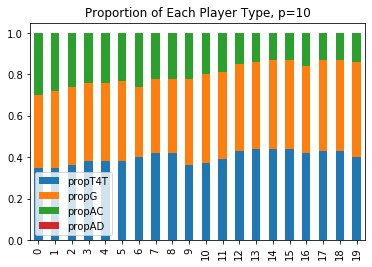

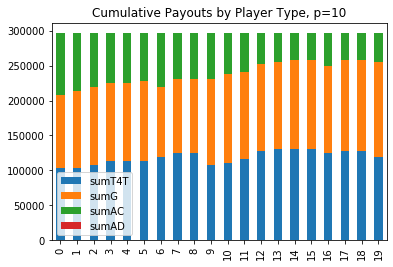

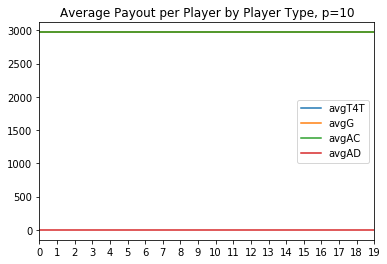

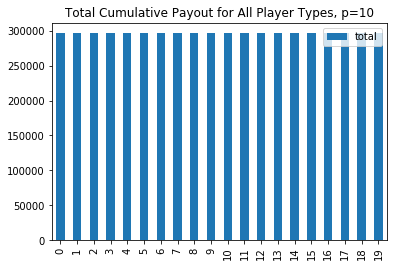

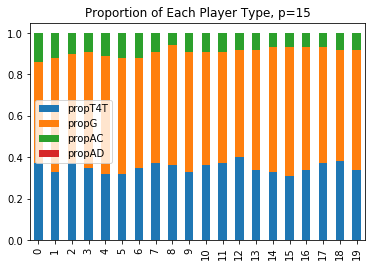

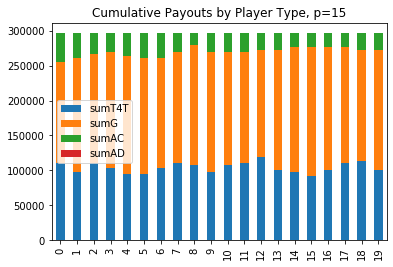

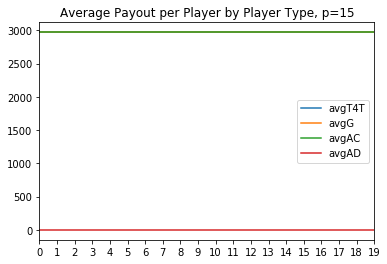

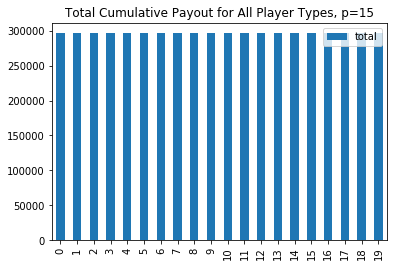

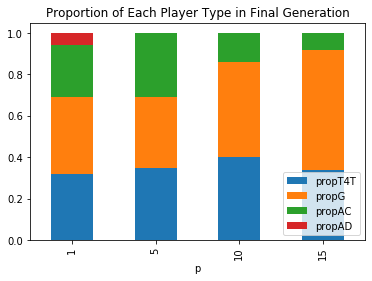

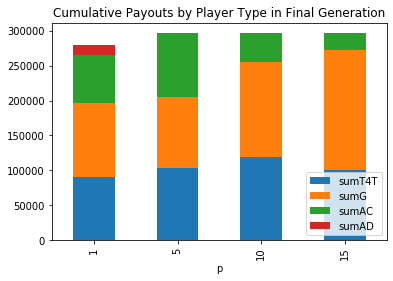

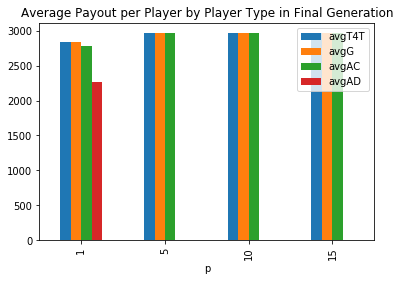

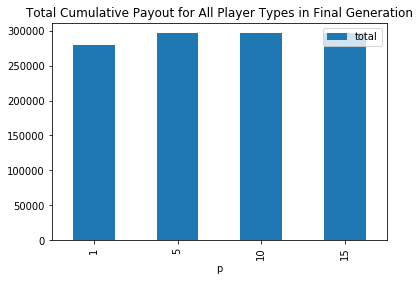

In [42]:
import pandas as pd
import random
import matplotlib.pyplot as plt

df_prop_last = pd.DataFrame(columns = ['propT4T', 'propG', 'propAC', 'propAD'])
df_payout_last = pd.DataFrame(columns = ['sumT4T', 'sumG', 'sumAC', 'sumAD'])
df_avg_last = pd.DataFrame(columns = ['avgT4T', 'avgG', 'avgAC', 'avgAD'])
df_total_last = pd.DataFrame(columns = ['total'])

n = 100
m = 5
ps = [1, 5, 10, 15]
k_con = 20

if(n%4 != 0):
    n = int(4 * round(float(n)/4))

numT4T = int(n/4)
numG = int(n/4)
numAC = int(n/4)
numAD = int(n/4)

#numT4T = 1
#numG = 1
#numAC = 1
#numAD = 97

#numT4T = 25
#numG = 25
#numAC = 0
#numAD = 50

#numT4T = 10
#numG = 0
#numAC = 80
#numAD = 10

def createPlayers(numT4T, numG, numAC, numAD):
    players = []
    for x in list(range(0, numT4T)):
        players.append(['T4T', 'T4T'+str(x), 0, []])

    for x in list(range(0, numG)):
        players.append(['G','G'+str(x), 0, []])

    for x in list(range(0, numAC)):
        players.append(['AC','AC'+str(x), 0])

    for x in list(range(0, numAD)):
        players.append(['AD','AD'+str(x), 0])
    random.shuffle(players)
    return players
    
def playGame(p, o):
    #True = Cooperate, False = Defect
    pMove = True
    oMove = True
    
    #T4T logic
    if(p[0] == 'T4T'):
        if(o[1] in p[3]):
            pMove = False
            #print(p[3])
            p[3].remove(o[1])
            #print('hello')
        else:
            pMove = True
    if(o[0] == 'T4T'):
        if(p[1] in o[3]):
            oMove = False
            o[3].remove(p[1])
            #print('hello')
        else:
            oMove = True 
    #G logic       
    if(p[0] == 'G'):
        if(o[1] in p[3]):
            pMove = False
        else:
            pMove = True
    if(o[0] == 'G'):
        if(p[1] in o[3]):
            oMove = False
        else:
            oMove = True 
    
    #AC logic
    if(p[0] == 'AC'):
        pMove = True
    if(o[0] == 'AC'):
        oMove = True
    
    #AD logic
    if(p[0] == 'AD'):
        pMove = False
    if(o[0] == 'AD'):
        oMove = False
        
    #Payouts
    if(pMove == True and oMove == True):
        p[2] = p[2] + 3
        o[2] = o[2] + 3
        
    if(pMove == False and oMove == True):
        p[2] = p[2] + 5
        
    if(pMove == True and oMove == False):
        o[2] = o[2] + 5
    
    if(pMove == False and oMove == False):
        p[2] = p[2] + 1
        o[2] = o[2] + 1
     
    #T4T and G logic
    if((p[0]=='T4T' or p[0]=='G') and oMove == False):
        p[3].append(o[1])
        #print(p[3])
    if((o[0]=='T4T' or o[0]=='G') and pMove == False):
        o[3].append(p[1])
        #print('t4t')

for p in ps:
    df_prop = pd.DataFrame(columns = ['propT4T', 'propG', 'propAC', 'propAD'])
    df_payout = pd.DataFrame(columns = ['sumT4T', 'sumG', 'sumAC', 'sumAD'])
    df_avg = pd.DataFrame(columns = ['avgT4T', 'avgG', 'avgAC', 'avgAD'])
    df_total = pd.DataFrame(columns = ['total'])
    
    for k in list(range(0,k_con)):
        propT4T = numT4T/n
        propG = numG/n
        propAC = numAC/n
        propAD = numAD/n
        props = {'propT4T':propT4T, 'propG':propG, 'propAC':propAC,'propAD':propAD}
        df_prop = df_prop.append(props, ignore_index = True)
        
        if(k==19):
            df_prop_last = df_prop_last.append(props, ignore_index = True)
        
        print("Gen " + str(k) + ": T4T: " + str(propT4T) + " G: "+ str(propG) + " AC: " + str(propAC) + " AD: " + str(propAD)) 

        players = createPlayers(numT4T, numG, numAC, numAD)
        for g in list(range(0,m)):    
            for y in players:
                #print(p[0])
                for o in players:
                    if(o[1] != y[1]):
                        playGame(y, o)

        rankedPlayers = sorted(players, key = lambda x: int(x[2]), reverse=True)

        sumT4T = 0
        sumG = 0
        sumAC = 0
        sumAD = 0

        for r in rankedPlayers:
            if(r[0] == 'T4T'):
                sumT4T = sumT4T+r[2]

            if(r[0] == 'G'):
                sumG = sumG+r[2]

            if(r[0] == 'AC'):
                sumAC = sumAC+r[2]

            if(r[0] == 'AD'):
                sumAD = sumAD+r[2]

        total = sumT4T+sumG+sumAC+sumAD      
        print("Gen " + str(k) + ": T4T: " + str(sumT4T) + " G: "+ str(sumG) + " AC: " + str(sumAC) + " AD: " + str(sumAD)+ " Total: " + str(total))

        totals={'total':total}
        df_total = df_total.append(totals, ignore_index=True)

        if(numT4T != 0):
            avgT4T = sumT4T/numT4T
        else:
            avgT4T = 0

        if(numG != 0):
            avgG = sumG/numG
        else:
            avgG = 0

        if(numAC != 0):
            avgAC = sumAC/numAC
        else:
            avgAC = 0

        if(numAD != 0):
            avgAD = sumAD/numAD
        else:
            avgAD = 0

        print("Gen " + str(k) + ": T4T: " + str(avgT4T) + " G: "+ str(avgG) + " AC: " + str(avgAC) + " AD: " + str(avgAD))

        payouts = {'sumT4T':sumT4T, 'sumG':sumG, 'sumAC':sumAC,'sumAD':sumAD}
        avgs = {'avgT4T':avgT4T, 'avgG':avgG, 'avgAC':avgAC,'avgAD':avgAD}
        df_payout = df_payout.append(payouts, ignore_index = True)
        df_avg = df_avg.append(avgs, ignore_index = True)

        remove = 0 - int((p/100)*n)
        rankedPlayers = rankedPlayers[:remove]
        rankedPlayers = rankedPlayers+ rankedPlayers[:-remove]

        numT4T = 0
        numG = 0
        numAC = 0
        numAD = 0

        for r in rankedPlayers:
            if(r[0] == 'T4T'):
                numT4T = numT4T+1

            if(r[0] == 'G'):
                numG = numG+1

            if(r[0] == 'AC'):
                numAC = numAC+1

            if(r[0] == 'AD'):
                numAD = numAD+1
                
        if(k==19):
            df_payout_last = df_payout_last.append(payouts, ignore_index = True)
            df_avg_last = df_avg_last.append(avgs, ignore_index = True)
            df_total_last = df_total_last.append(totals, ignore_index=True)
            
    df_prop.plot(xticks = df_prop.index, kind = 'bar', stacked = True, title = 'Proportion of Each Player Type, p=' + str(p))
    df_payout.plot(xticks = df_payout.index, kind = 'bar', stacked = True, title = 'Cumulative Payouts by Player Type, p=' + str(p))
    df_avg.plot(xticks = df_avg.index, title = 'Average Payout per Player by Player Type, p=' + str(p))
    df_total.plot(xticks = df_total.index, kind = 'bar', stacked = True, title = 'Total Cumulative Payout for All Player Types, p=' + str(p))    
    
df_prop_last['p'] = ps    
df_prop_last = df_prop_last.set_index('p')

df_payout_last['p'] = ps    
df_payout_last = df_payout_last.set_index('p')

df_avg_last['p'] = ps    
df_avg_last = df_avg_last.set_index('p')

df_total_last['p'] = ps    
df_total_last = df_total_last.set_index('p')
    
df_prop_last.plot(xticks = df_prop_last.index, kind = 'bar', stacked = True, title = 'Proportion of Each Player Type in Final Generation')
df_payout_last.plot(xticks = df_payout_last.index, kind = 'bar', stacked = True, title = 'Cumulative Payouts by Player Type in Final Generation')
df_avg_last.plot(xticks = df_avg_last.index, kind = 'bar', title = 'Average Payout per Player by Player Type in Final Generation')
df_total_last.plot(xticks = df_prop_last.index, kind = 'bar', stacked = True, title = 'Total Cumulative Payout for All Player Types in Final Generation')

#print(df_total_last)